In [40]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import scipy

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# 한글 깨짐 방지
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font',family = font_name)

# 마이너스 기호 표시
matplotlib.rcParams['axes.unicode_minus'] = False
 
# !pip install pandas-profiling
import pandas_profiling as pp

# 최대 줄 수 설정
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)

# 경고 메시지 숨길 때
import warnings
warnings.filterwarnings(action = 'ignore') 

## ▶ import data
> train_data - the training set. Daily historical data from January 2013 to October 2015
- date, date_block_num, shop_id, item_id, item_price, item_cnt_day
- n = 2,935,849

> test data - the test set. You need to forecast the sales for these shops and products for November 2015
- id, shop_id, item_id
- n = 214,200


In [2]:
train_data = pd.read_csv('sales_train_v2.csv')
test_data = pd.read_csv('test.csv')

train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
test_data

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [4]:
len(train_data)

2935849

In [5]:
len(test_data)

214200

In [6]:
# pp.ProfileReport(train_data)
# pp.ProfileReport(test_data)

### ▶ 추가 파일 
> items.csv - supplemental information about the items/products.
- item_name, item_id, item_category_id

> item_categories.csv - supplemental information about the items categories.
- item_category_name, item_category_id

> shops.csv - supplemental information about the shops.
- shop_name, shop_id



In [7]:
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

print(items.tail())
print('-'*40)
print(item_categories.tail())
print('-'*40)
print(shops.tail())

                                               item_name  item_id  item_category_id
22165             Ядерный титбит 2 [PC, Цифровая версия]    22165                31
22166    Язык запросов 1С:Предприятия  [Цифровая версия]    22166                54
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    22167                49
22168                                Яйцо для Little Inu    22168                62
22169                      Яйцо дракона (Игра престолов)    22169                69
----------------------------------------
           item_category_name  item_category_id
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83
----------------------------------------
                   shop_name  shop_id
55  Цифровой склад 1С-Онлайн       55
56      Чехов ТРЦ "Карнавал"       56
57   Якутск 

### ▶ train_data 추가파일 merge

In [8]:
train_data2 = pd.merge(train_data, items, on = 'item_id')
train_data2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,"АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)",40
2935845,01.10.2015,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [9]:
train_data3 = pd.merge(train_data2, item_categories, on = 'item_category_id')
train_data3

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [10]:
train_data4 = pd.merge(train_data3, shops, on = 'shop_id')
train_data4

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935845,21.09.2015,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935846,16.09.2015,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935847,22.09.2015,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


### ▶ test_data 추가파일 merge

In [11]:
test_data2 = pd.merge(test_data, items, on = 'item_id')
test_data2

,ID,shop_id,item_id,item_name,item_category_id
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19
1,5100,4,5037,"NHL 15 [PS3, русские субтитры]",19
2,10200,6,5037,"NHL 15 [PS3, русские субтитры]",19
3,15300,3,5037,"NHL 15 [PS3, русские субтитры]",19
4,20400,2,5037,"NHL 15 [PS3, русские субтитры]",19
...,...,...,...,...,...
214195,193799,46,969,3 ДНЯ НА УБИЙСТВО (BD),37
214196,198899,41,969,3 ДНЯ НА УБИЙСТВО (BD),37
214197,203999,44,969,3 ДНЯ НА УБИЙСТВО (BD),37
214198,209099,39,969,3 ДНЯ НА УБИЙСТВО (BD),37


In [12]:
test_data3 = pd.merge(test_data2, item_categories, on = 'item_category_id')
test_data3

,ID,shop_id,item_id,item_name,item_category_id,item_category_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
1,5100,4,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
2,10200,6,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
3,15300,3,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
4,20400,2,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3
...,...,...,...,...,...,...
214195,193262,46,168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,44,Книги - Аудиокниги (Цифра)
214196,198362,41,168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,44,Книги - Аудиокниги (Цифра)
214197,203462,44,168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,44,Книги - Аудиокниги (Цифра)
214198,208562,39,168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,44,Книги - Аудиокниги (Цифра)


In [13]:
test_data4 = pd.merge(test_data3, shops, on = 'shop_id')
test_data4

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
1,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
2,15,5,4872,"Minecraft. Playstation 3 Edition [PS3, русская...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
3,21,5,5002,"NBA 2K16 [PS3, русская документация]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
4,23,5,5814,"Plants vs. Zombies Garden Warfare [PS3, русска...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад"""
...,...,...,...,...,...,...,...
214195,213658,45,342,"1С:Аудиокниги. Путеводитель. Прага [PC, Цифров...",44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214196,213659,45,254,1С:Аудиокниги. Илья Ильин. Если бы я был робин...,44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214197,213660,45,204,"1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Ци...",44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""
214198,213661,45,180,1С:Аудиокниги. Былины русского народа. Сборник...,44,Книги - Аудиокниги (Цифра),"Самара ТЦ ""ПаркХаус"""


## ▶ EDA

In [14]:
# 결측치 확인
print(train_data4.isnull().sum())
print('-'*40)
print(test_data4.isnull().sum())

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64
----------------------------------------
ID                    0
shop_id               0
item_id               0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64


In [15]:
train_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                  object
date_block_num        int64
shop_id               int64
item_id               int64
item_price            float64
item_cnt_day          float64
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [16]:
train_data4.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [17]:
test_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 7 columns):
ID                    214200 non-null int64
shop_id               214200 non-null int64
item_id               214200 non-null int64
item_name             214200 non-null object
item_category_id      214200 non-null int64
item_category_name    214200 non-null object
shop_name             214200 non-null object
dtypes: int64(4), object(3)
memory usage: 13.1+ MB


In [18]:
test_data4.describe()

,ID,shop_id,item_id,item_category_id
count,214200.000000,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627,46.309608
std,61834.358168,17.561933,6252.644590,16.716581
min,0.000000,2.000000,30.000000,0.000000
25%,53549.750000,16.000000,5381.500000,37.000000
50%,107099.500000,34.500000,11203.000000,43.000000
75%,160649.250000,47.000000,16071.500000,58.000000
max,214199.000000,59.000000,22167.000000,83.000000


### -> test data에서 구해야 할 것 : item_price,  item_cnt_day

> Data fields
* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* item_category_name - name of item category

### 1. 'item_price' 변수

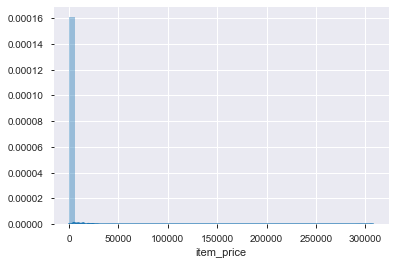

In [19]:
sns.distplot(train_data4['item_price'])

> distplot으로 보기엔 이상치가 존재하기 때문에 어려움

In [20]:
train_data4['item_price'].sort_values()

2256678        -1.0000
461425          0.0700
1711415         0.0700
1711452         0.0875
461388          0.0900
              ...     
2005340     42990.0000
2678339     49782.0000
355222      50999.0000
2693298     59200.0000
2678303    307980.0000
Name: item_price, Length: 2935849, dtype: float64

In [21]:
train_data4[train_data4['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2256678,15.05.2013,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,Игры - PS3,"Москва ТЦ ""Серебряный Дом"""


> 'item_price'가 0보다 작을 경우는 없음 -> 제외

In [22]:
train_data4.drop(train_data4[train_data4['item_price'] < 0].index, axis=0, inplace=True)
train_data4['item_price'].sort_values()

461425          0.0700
1711415         0.0700
1711452         0.0875
461388          0.0900
954788          0.1000
              ...     
2005340     42990.0000
2678339     49782.0000
355222      50999.0000
2693298     59200.0000
2678303    307980.0000
Name: item_price, Length: 2935848, dtype: float64

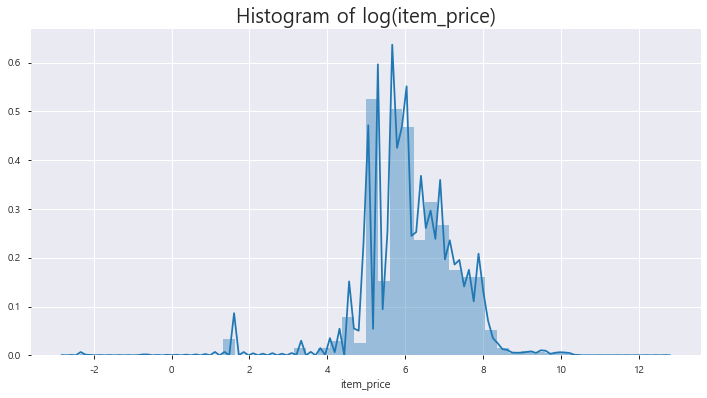

In [41]:
plt.figure(figsize = (12,6))
plt.title('Histogram of log(item_price)',size=20)
sns.distplot(np.log(train_data4['item_price']))
plt.show()

> 예측변수를 정규화 (log화가 적당할듯함) 

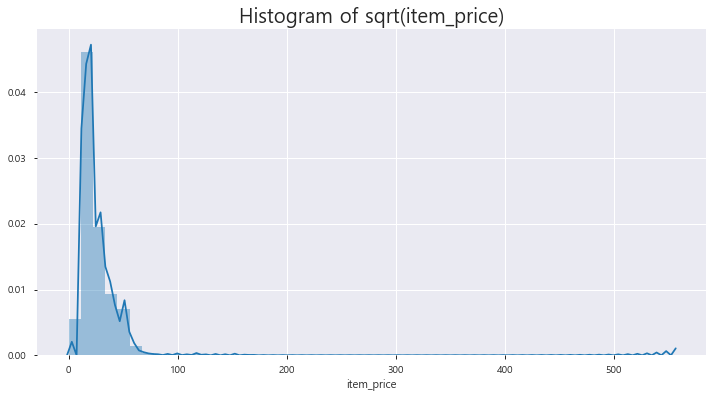

In [42]:
plt.figure(figsize = (12,6))
plt.title('Histogram of sqrt(item_price)',size=20)
sns.distplot(np.sqrt(train_data4['item_price']))
plt.show()

### 2. 'item_cnt_day' 변수

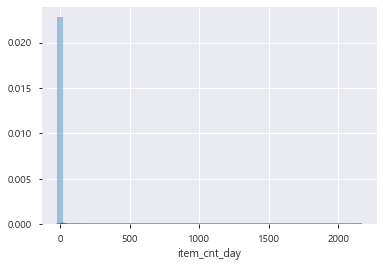

In [43]:
sns.distplot(train_data4['item_cnt_day'])

In [44]:
train_data4['item_cnt_day'].sort_values()

2688690     -22.0
2614214     -16.0
2697331      -9.0
2682049      -6.0
998699       -6.0
            ...  
2676429     624.0
2933626     637.0
2698367     669.0
2693208    1000.0
2694327    2169.0
Name: item_cnt_day, Length: 2935848, dtype: float64

In [45]:
train_data4[train_data4['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day,weekday
181,2013-02-25,1,59,10308,399.00,-1.0,ГАНГСТЕР (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,2,25,Monday
204,2013-06-20,5,59,14549,149.00,-1.0,МЕСТО ВСТРЕЧИ ИЗМЕНИТЬ НЕЛЬЗЯ э (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,6,20,Thursday
1894,2014-09-12,20,59,19089,149.00,-1.0,СТАРТРЕК ВОЗМЕЗДИЕ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2014,9,12,Friday
2056,2014-05-20,16,59,11034,425.76,-1.0,ДЖОН Ф. КЕННЕДИ: ВЫСТРЕЛЫ В ДАЛЛАСЕ (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2014,5,20,Tuesday
2082,2013-11-18,10,59,19688,999.00,-1.0,ТИХООКЕАНСКИЙ РУБЕЖ (2 BD)+3D открытка,37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,11,18,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897136,2014-11-14,22,40,13205,299.00,-1.0,"Колода карт для игры в покер ""Texas Holdem"" St...",64,Подарки - Настольные игры,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",2014,11,14,Friday
2899111,2014-05-11,16,40,4993,2999.00,-1.0,"NBA 2K14 [PS4, английская версия]",20,Игры - PS4,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",2014,5,11,Sunday
2900175,2014-10-06,21,20,20415,5999.00,-1.0,Фигурка Batman 1989 Michael Keaton as Batman 1...,72,Подарки - Фигурки,"Москва ""Распродажа""",2014,10,6,Monday
2909468,2014-03-14,14,55,1982,599.00,-1.0,"Borderlands 2 (СофтКлаб) [PC, Цифровая версия]",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн,2014,3,14,Friday


> 'item_cnt_day'가 0보다 작을 경우 -> 환불 건수? 

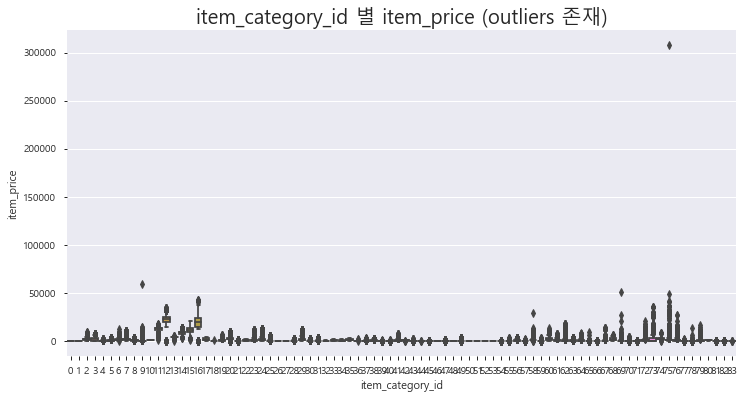

In [46]:
# 이상치 제거 전 boxplot
plt.figure(figsize = (12,6))
plt.title('item_category_id 별 item_price (outliers 존재)',size=20)
sns.boxplot('item_category_id','item_price',data=train_data4,showfliers=True)
plt.show()

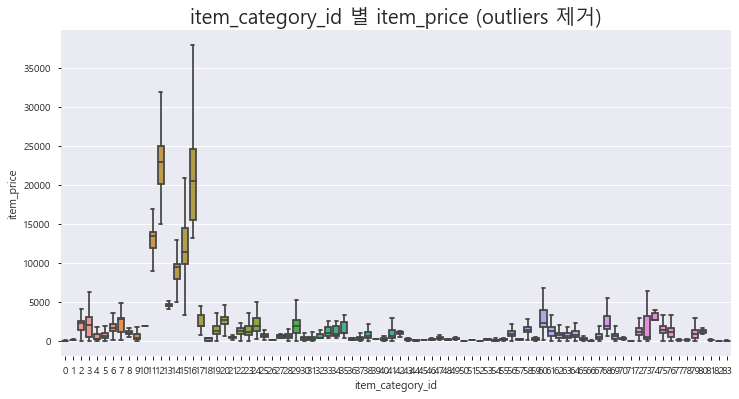

In [47]:
# 이상치 제거 후 boxplot
plt.figure(figsize = (12,6))
plt.title('item_category_id 별 item_price (outliers 제거)',size=20)
sns.boxplot('item_category_id','item_price',data=train_data4,showfliers=False)
plt.show()

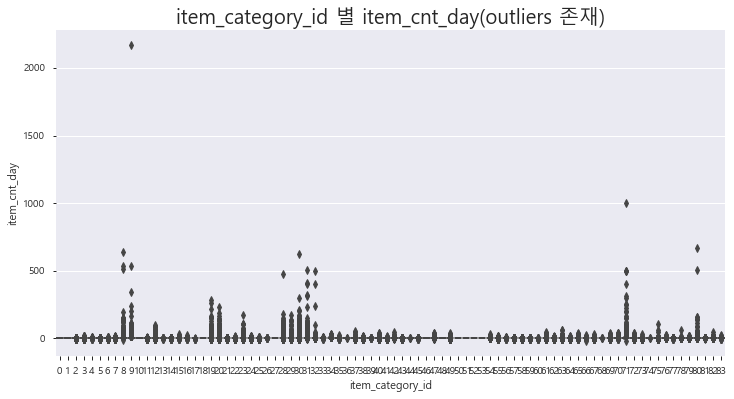

In [48]:
# 이상치 제거 전 boxplot
plt.figure(figsize = (12,6))
plt.title('item_category_id 별 item_cnt_day(outliers 존재)',size=20)
sns.boxplot('item_category_id','item_cnt_day',data=train_data4,showfliers=True)
plt.show()

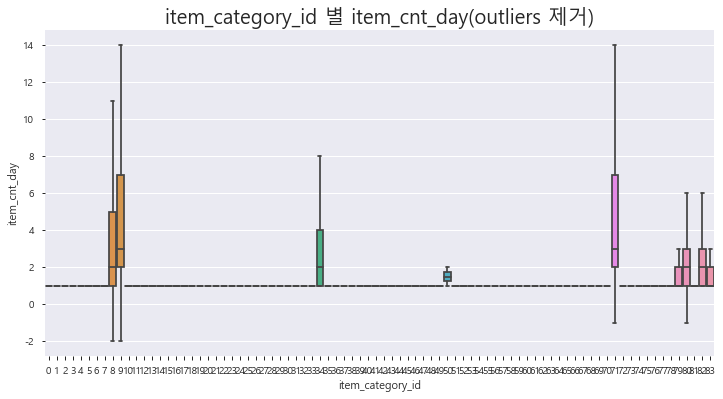

In [49]:
# 이상치 제거 후 boxplot
plt.figure(figsize = (12,6))
plt.title('item_category_id 별 item_cnt_day(outliers 제거)',size=20)
sns.boxplot('item_category_id','item_cnt_day',data=train_data4,showfliers=False)
plt.show()

## ▶ 데이터 타입 나눠서 탐색

In [32]:
t1 = train_data4.loc[:,(train_data4.dtypes == 'int64') | (train_data4.dtypes == 'float64')]
t2 = train_data4.loc[:,(train_data4.dtypes == 'object')]

In [33]:
t1

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,0,59,22154,999.0,1.0,37
1,3,59,944,150.0,1.0,37
2,5,59,944,199.5,1.0,37
3,6,59,944,199.5,1.0,37
4,8,59,944,299.0,2.0,37
...,...,...,...,...,...,...
2935844,33,55,13093,250.0,1.0,36
2935845,32,55,13091,1000.0,1.0,36
2935846,32,55,13094,2500.0,1.0,36
2935847,32,55,13094,2500.0,2.0,36


In [34]:
t2

,date,item_name,item_category_name,shop_name
0,02.01.2013,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...
2935844,22.10.2015,Карта оплаты Windows: 250 рублей [Цифровая вер...,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935845,21.09.2015,Карта оплаты Windows: 1000 рублей [Цифровая ве...,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935846,16.09.2015,Карта оплаты Windows: 2500 рублей [Цифровая ве...,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935847,22.09.2015,Карта оплаты Windows: 2500 рублей [Цифровая ве...,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


In [35]:
t1.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
date_block_num,1.000000,0.019273,0.009355,0.095010,0.009402,0.029127
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230,0.019380
item_id,0.009355,0.029396,1.000000,-0.134104,0.016650,0.369430
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197,-0.253554
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000,0.014768
item_category_id,0.029127,0.019380,0.369430,-0.253554,0.014768,1.000000


### ▶ 'date' 포맷 변경(datetime으로) 

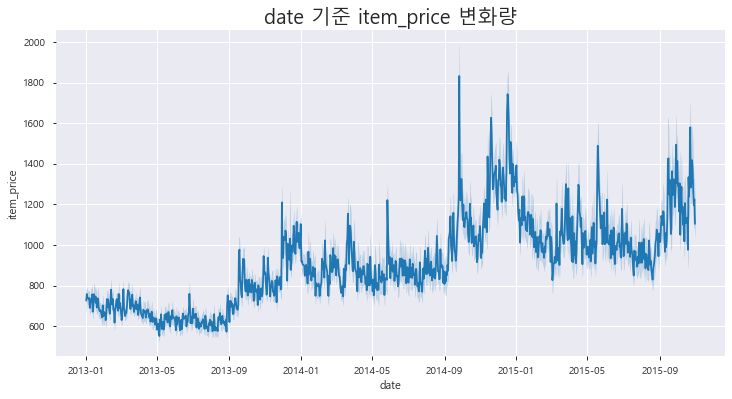

In [50]:
plt.figure(figsize = (12,6))
plt.title('date 기준 item_price 변화량',size=20)
sns.lineplot(train_data4['date'],train_data4['item_price'])

In [37]:
train_data4['date'] = pd.to_datetime(train_data4['date'],format='%d.%m.%Y')

In [38]:
train_data4['year'] = train_data4['date'].dt.year
train_data4['month'] = train_data4['date'].dt.month
train_data4['day'] = train_data4['date'].dt.day
train_data4['weekday'] = train_data4['date'].dt.weekday_name

In [39]:
train_data4.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day,weekday
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,1,2,Wednesday
1,2013-04-26,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,4,26,Friday
2,2013-06-26,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,6,26,Wednesday
3,2013-07-20,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,7,20,Saturday
4,2013-09-14,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,9,14,Saturday


> 시계열데이터의 경향을 파악하고자 함